In [1]:
import matplotlib.pyplot as plt
import wordcloud
import pandas as pd
from IPython.display import display

In [2]:
places_df = pd.read_csv('data/places_TA.csv')
df = pd.read_csv('data/reviews_TA.csv')
words = pd.read_csv('data/words.csv')
bigramms = pd.read_csv('data/bigramms.csv')

In [3]:
df.loc[df.url.isin(places_df.url)].shape

(4520, 13)

In [4]:
# функция для рисования облака слов
def get_cloud(words_list, title, cm, path):
    stop = ["который", "кой_случай","большой_желание","этот_магазин","вообще", "которое","которые","много","сказал", "ничего","второй_раз","этот_гостиница","этот_церковь", "этот_автобус", "один_место","этот_храм","свой_дело", "такой_ощущение", "этот_парк", "один_сторона", "свой_время", "один_раз", "первый_раз", "этот_отель","данный_магазин", "другой_магазин","какой", "такой", "тот", "если","только", "есть","была", "место", "месте", "было", "были", "тогда","очень", "этот", "другой", "также", "чтобы", "быть", "мочь", "свой", "весь", "один"]
    if 'позитивные' in title:
        stop.extend(["весь_парк", "этот_парк","особый_фекалька", "мой_дочь", "другой_время", "небольшой_часть", "немногий_место", "городской_суета", "такой_красота", "большой_количество", "огромное_количество", "любой_время", "этот_участок", "этот_набережная", "сам_река", "наш_строитель", "грязный_собака", "выхлопной_газ"])
    elif 'негативн' in title:
        stop.extend(["отличное_место", "хороший_парк","красивый_мост","дневный_прогулка", "самый_чувство", "отличный_место", "никакой_давление", "третий_глаз", "открытый_человек", "открытый_площадка", "маленький_ребенок", "последний_кусочек", "хороший_место", "дневный_прогулка", "самый_чувство", "отличный_место", "никакой_давление", "третий_глаз", "открытый_человек", "открытый-площадка", "маленький_ребенок", "последний_кусочек","этот_парк", "старый_центр", "один_сторона", "такой_ощущение", "парковая_зона", "прекрасное_место", "некоторый_место", "некоторый_аттракцион", "такой_место", "этот_мост", "тихий_место", "сам_центр", "центральный_место", "сам_конструкция", "городской_парк", "детский_площадка", "большой_количество", "огромный_парк", "хороший_тень", "зеленый_зона", "краснодарский_край", "прекрасный_дерево", "сам_дело", "больший_территория", "некоторый_человек", "прохладный_тень", "хороший_расположение", "один_слово","больший_дерево", "каждый_день", "некоторый_место", "больший_часть", "свой_питомец", "редкий_место", "живописный_окрестность", "удобный_дорожка", "мой_сердечко", "прохладный_тень", "прогулочный_зона", "прекрасный место"])
    wc = wordcloud.WordCloud(collocations=True, 
                             background_color = 'white', 
                             width=1000, 
                             height=600, 
                             min_word_length=4, 
                             colormap=cm,
                             stopwords= stop).generate(" ".join(words_list))
    
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()
    wc.to_file(path+'/'+title+'.png')

In [5]:
g = ['NOUN','ADJF', 'ADJS', 'COMP','VERB', 'INFN', 'PRTF', 'PRTS', 'GRND', 'ADVB']

# Достопримечательности

## Анализ слов по всем отзывам

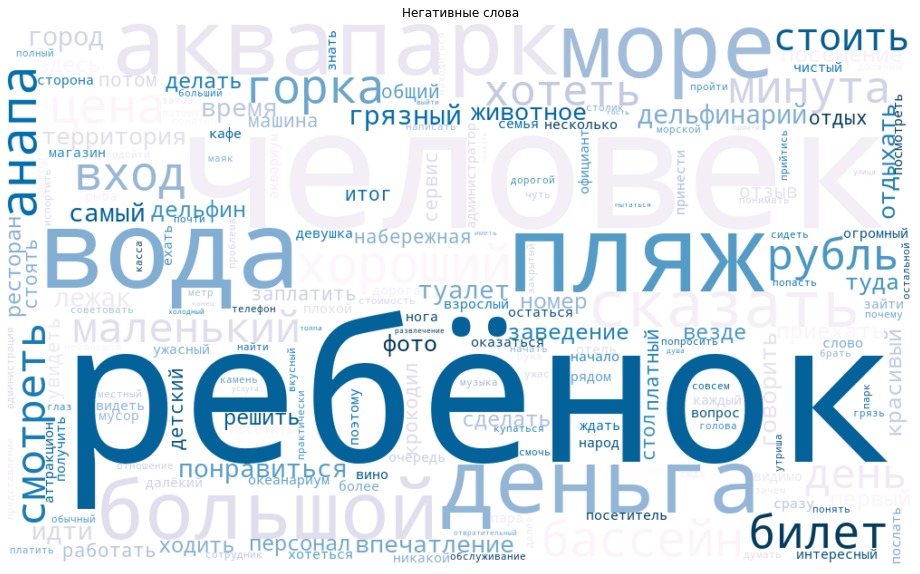

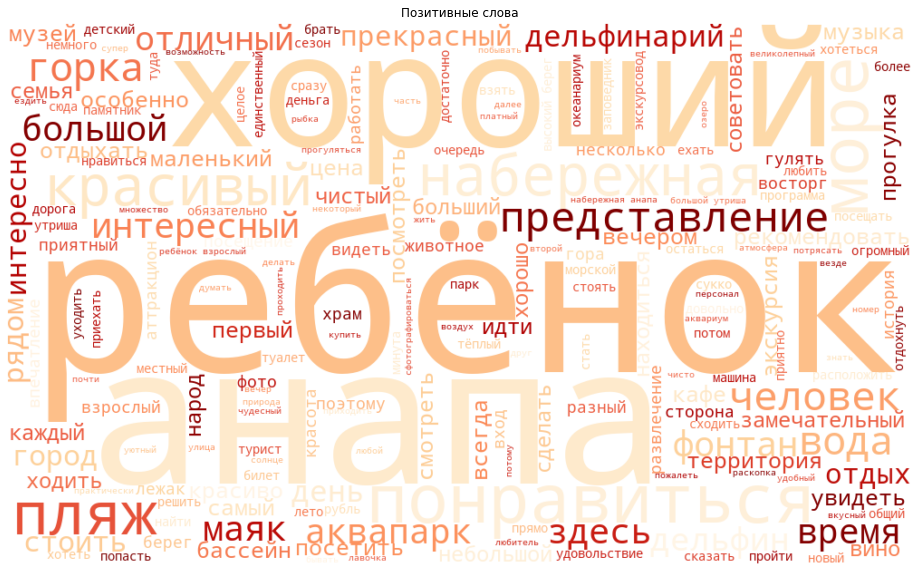

In [6]:
get_cloud(words.loc[( (words.grammema.isin(g)) & (words.rating<3)) , 'normal_form'].to_list(), 'Негативные слова', 'PuBu', 'data/charts')
get_cloud(words.loc[( (words.grammema.isin(g)) & (words.rating>3)) , 'normal_form'].to_list(), 'Позитивные слова', 'OrRd','data/charts')

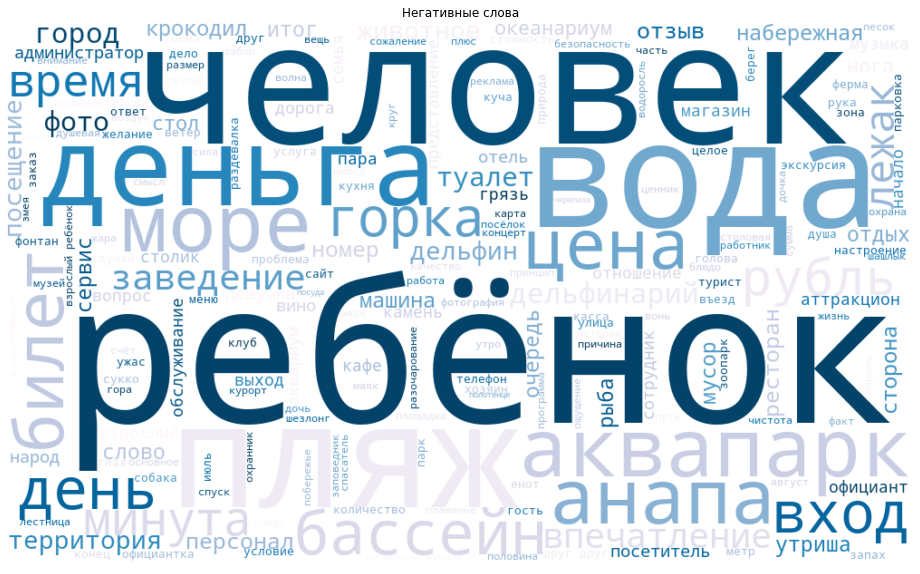

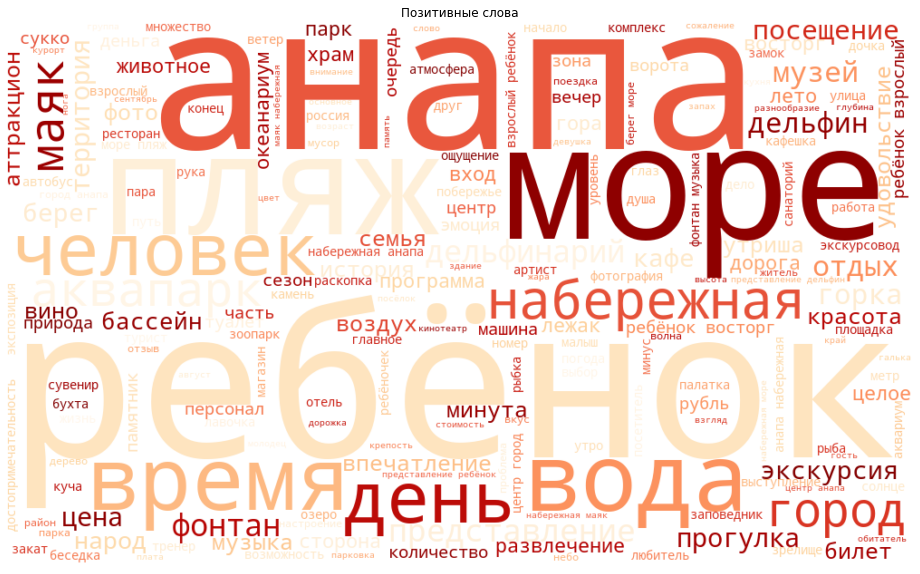

In [7]:
get_cloud(words.loc[( (words.grammema=='NOUN') & (words.rating<3)) , 'normal_form'].to_list(), 'Негативные слова', 'PuBu', 'data/charts')
get_cloud(words.loc[( (words.grammema=='NOUN') & (words.rating>3)) , 'normal_form'].to_list(), 'Позитивные слова', 'OrRd','data/charts')

## Анализ биграмм по всем отзывам

In [37]:
bigramms.shape

(101913, 13)

In [8]:
bigramms = bigramms.drop(columns = 'category').merge(places_df[['Category AN', 'url']], how = 'left', on = 'url').rename(columns = {'Category AN':'category'})

In [9]:
b_temp = bigramms.loc[((~bigramms.word1.str.contains('такой|сам|каждый|тот|целый|другой|один|свой|мой|следующий|данный|этот|весь|самый|наш')) & (bigramms.tag1.isin(['ADJF', 'ADJS'])) & (bigramms.tag2 == 'NOUN'))]

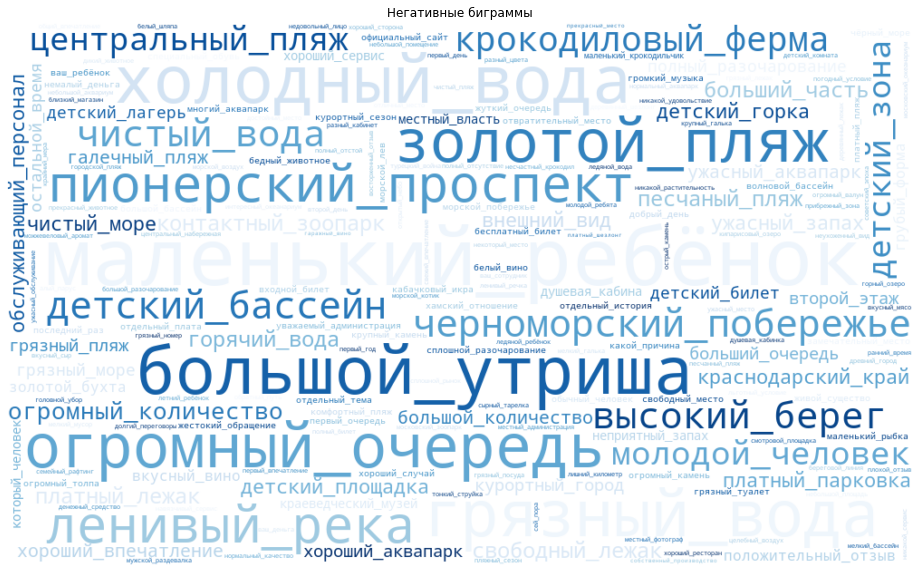

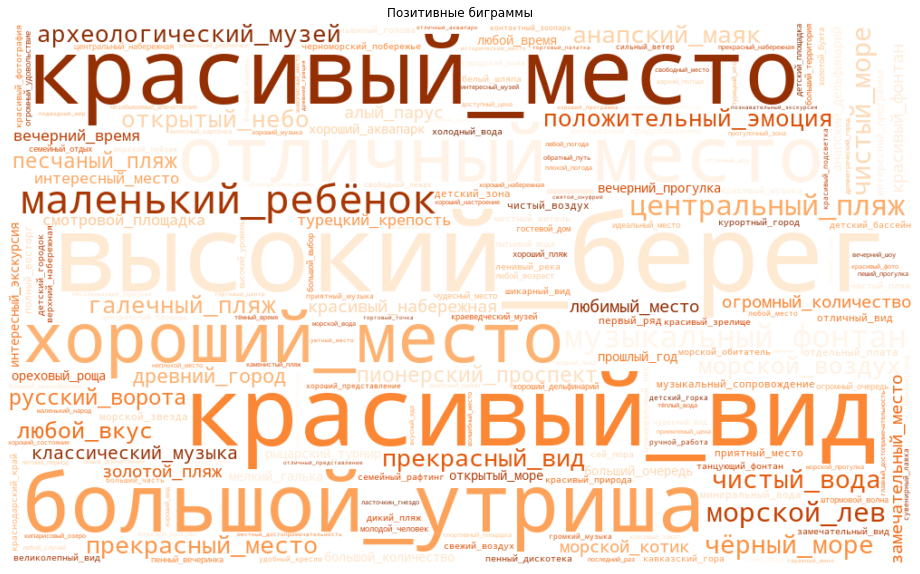

In [10]:
get_cloud(b_temp.loc[(~bigramms.word1.str.contains('красивый')) & ((b_temp.rating<3) | ((b_temp.rating==3) & (b_temp.score<0))), 'bigramm'].str[2:-2].str.split("', '").str.join('_').to_list(), 'Негативные биграммы', 'Blues','data/charts')
get_cloud(b_temp.loc[(b_temp.rating>3) , 'bigramm'].str[2:-2].str.split("', '").str.join('_').to_list(), 'Позитивные биграммы', 'Oranges','data/charts')

## Анализ биграмм по категориям

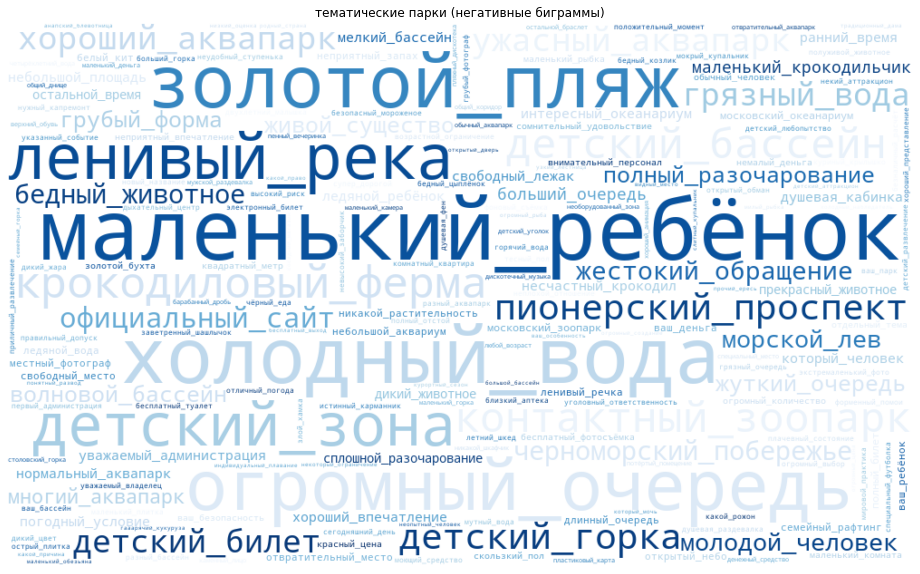

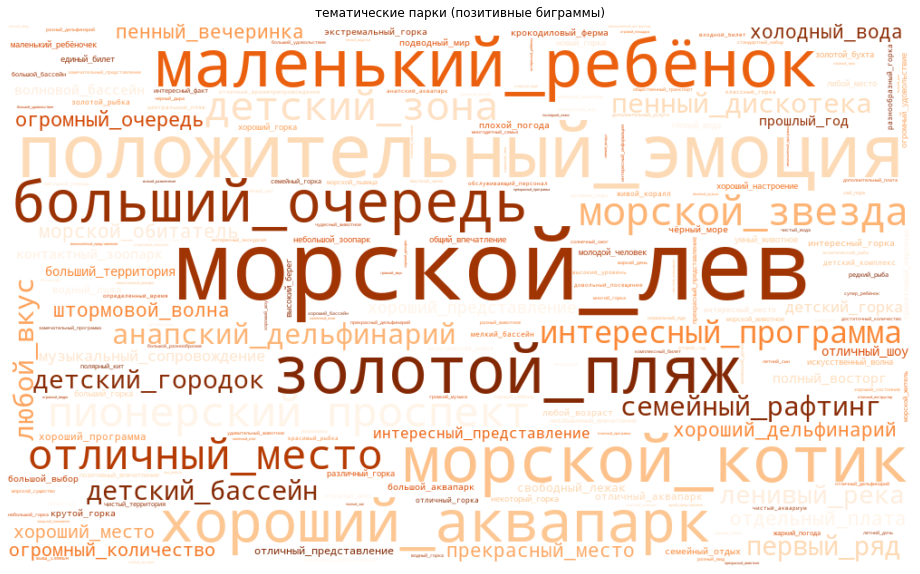

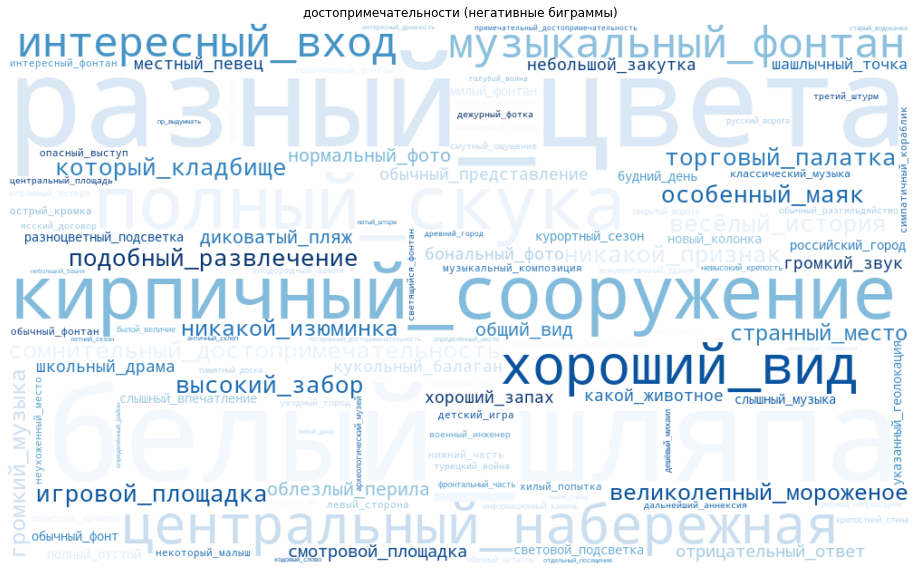

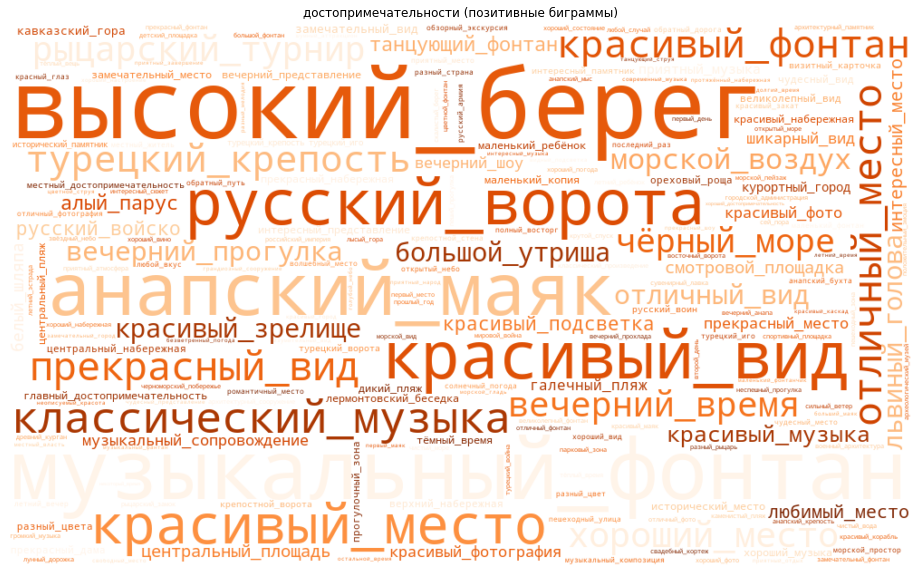

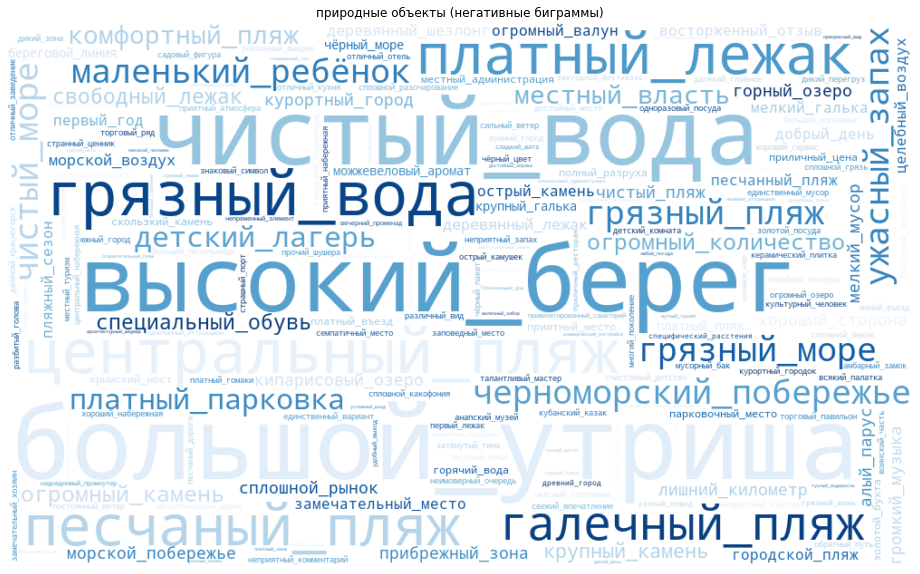

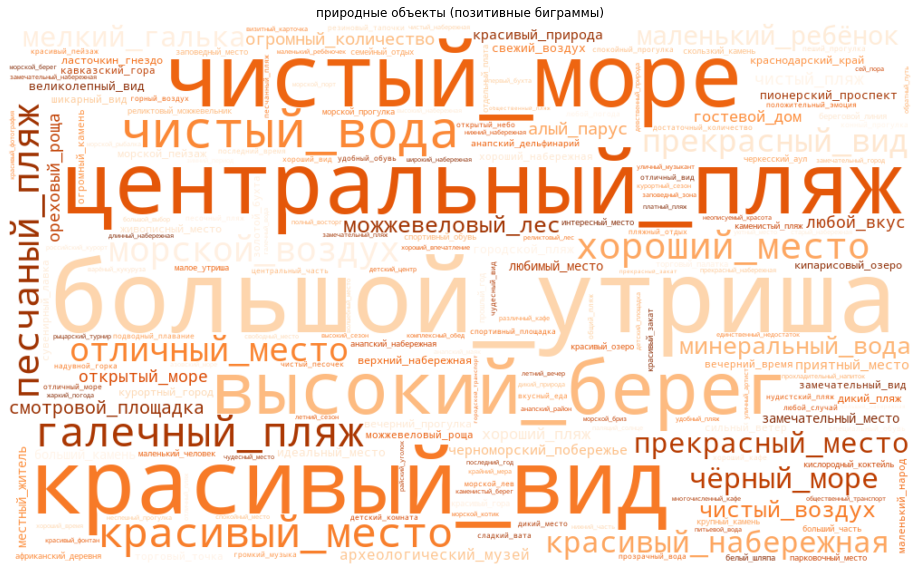

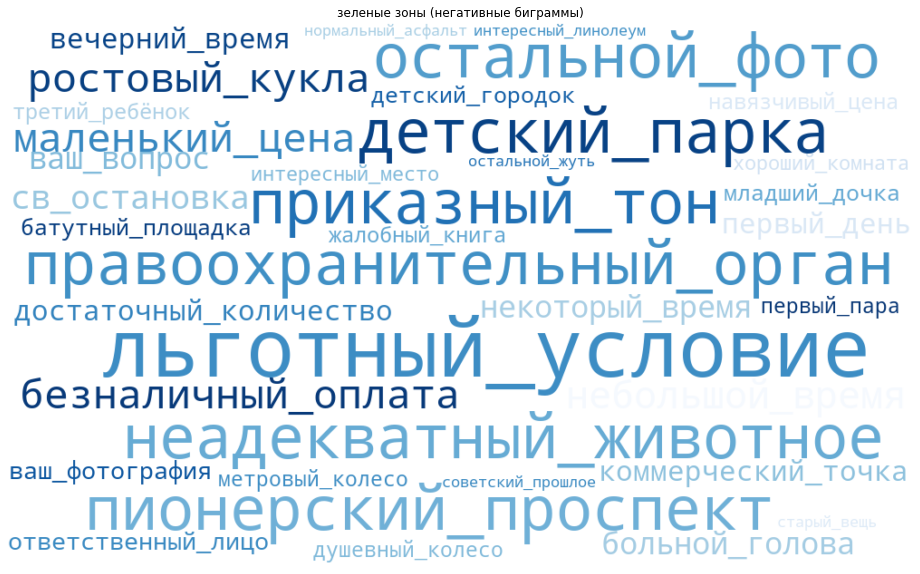

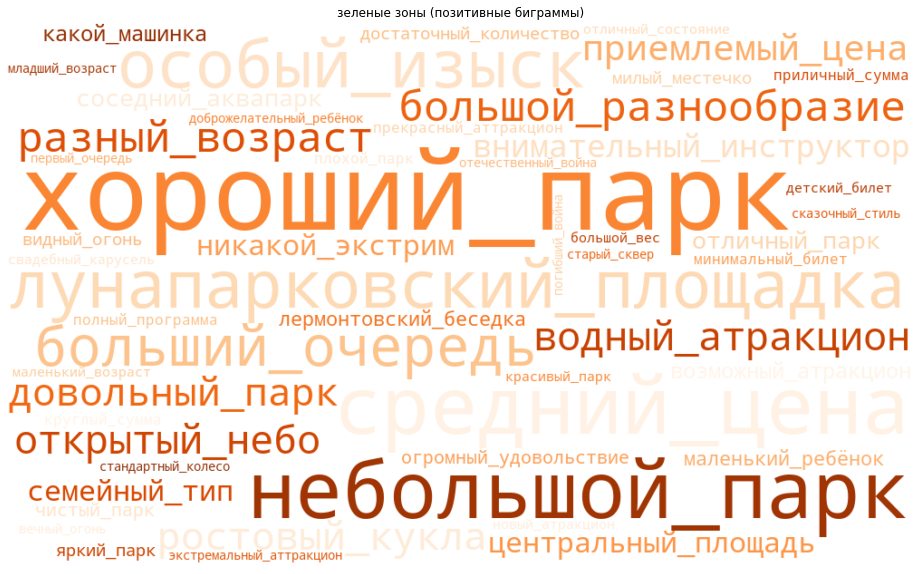

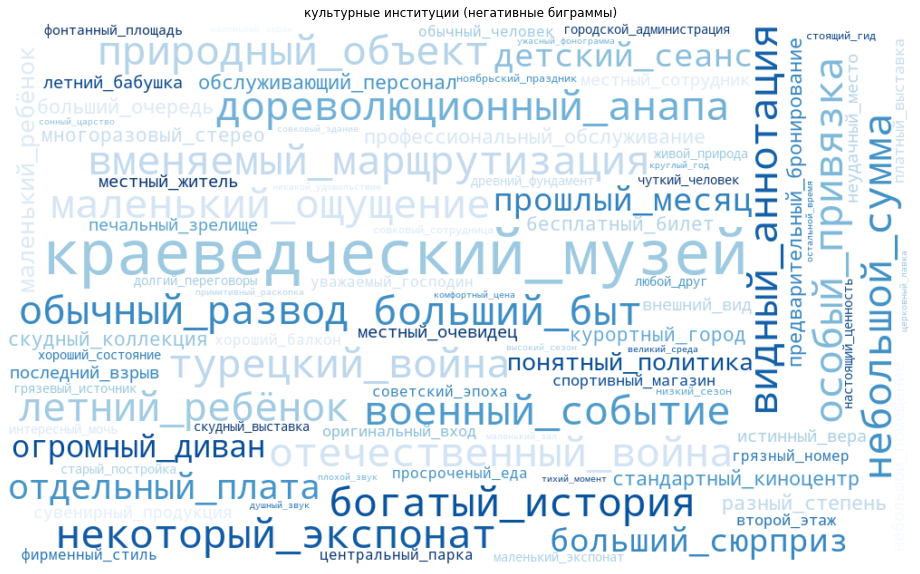

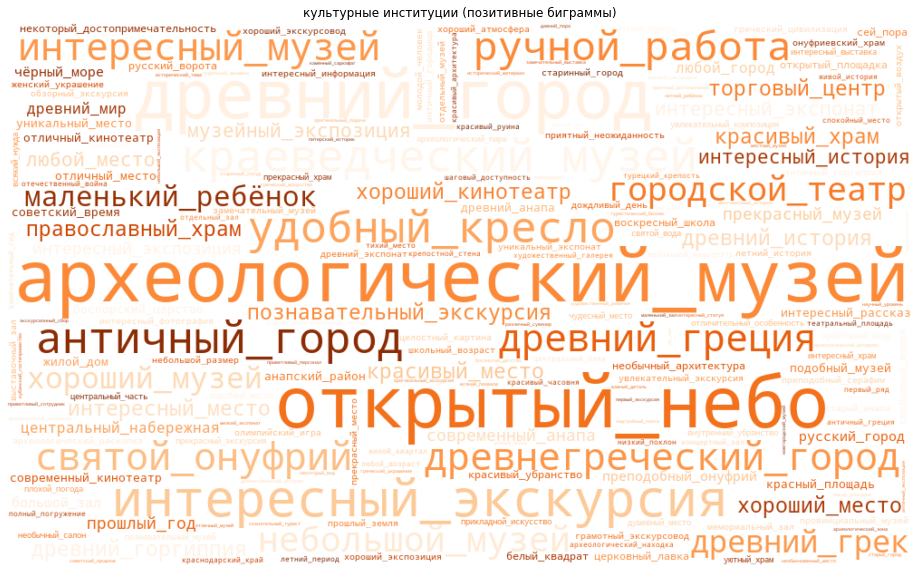

nan


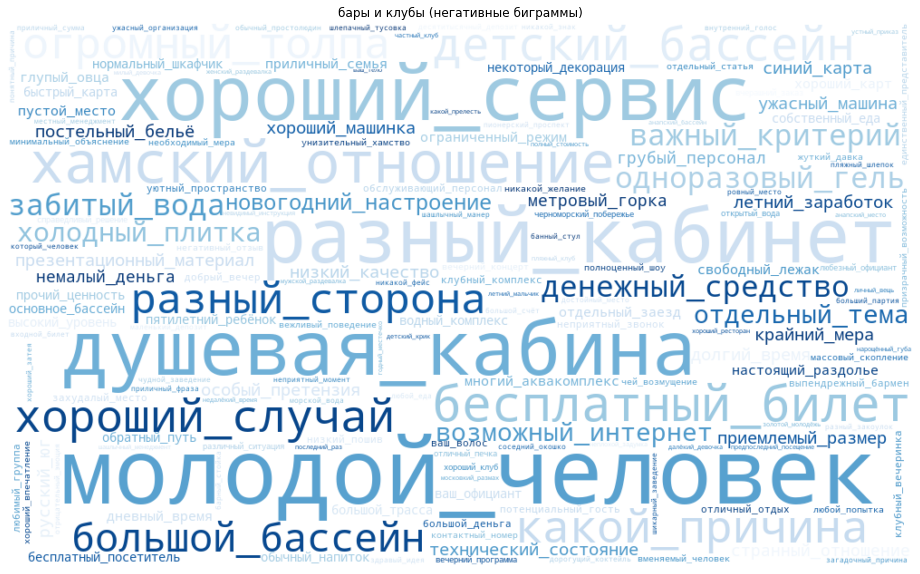

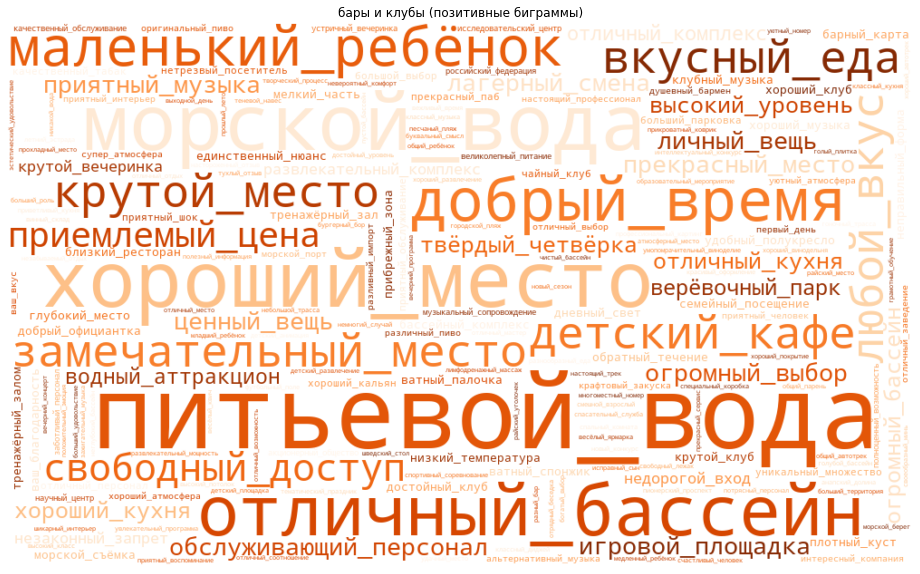

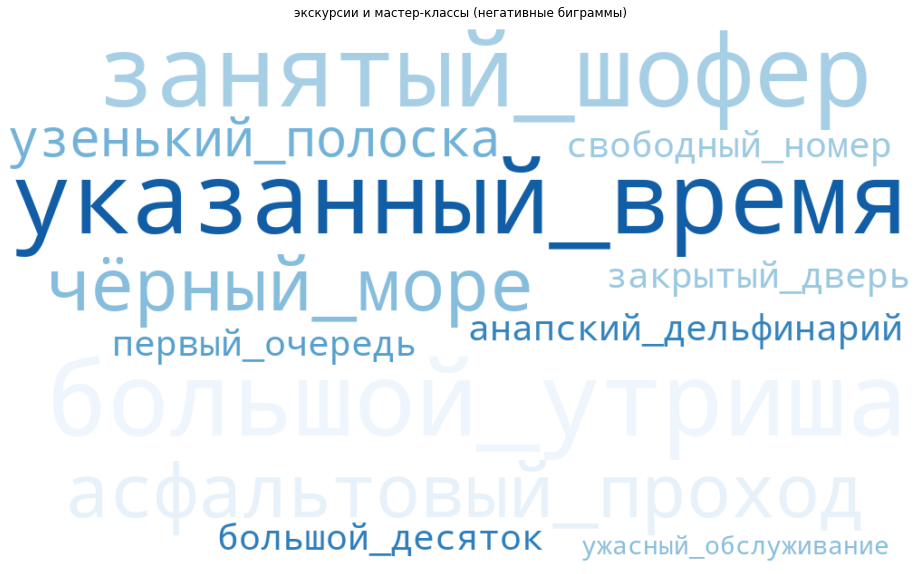

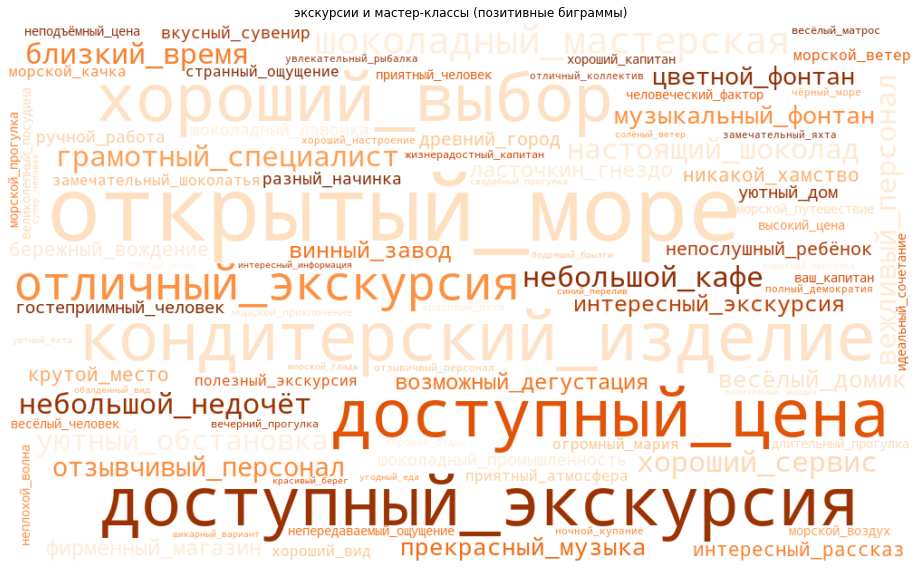

In [11]:
for i in b_temp.category.drop_duplicates():
    try:
        get_cloud(b_temp.loc[(b_temp.category == i) & (~bigramms.word1.str.contains('красивый')) & ((b_temp.rating<3) | ((b_temp.rating==3) & (b_temp.score<0))), 'bigramm'].str[2:-2].str.split("', '").str.join('_').to_list(), i+ ' (негативные биграммы)', 'Blues','data/charts')
        get_cloud(b_temp.loc[(b_temp.category == i) & (b_temp.rating>3) , 'bigramm'].str[2:-2].str.split("', '").str.join('_').to_list(), i+' (позитивные биграммы)', 'Oranges','data/charts')
    except:
        print(i)